BÀI TẬP THỰC HÀNH PTDL1 TUẦN 4: DỮ LIỆU TUYỂN SINH ĐẠI HỌC

In [24]:
'''
Phần 1: Các thao tác cơ bản
Bước 1: Xử lý cơ bản
    1. Xác định số lượng yếu tố (biến số) tham gia vào yêu cầu
    2. Thu thập dữ liệu (data collection)
    3. Tổng quan dữ liệu VD: df.info()...
    4. Xử lý cơ bản:
        - Loại bỏ dòng rỗng
        - Loại bỏ dòng trùng
        - Khảo sát dữ liệu thiếu
        - Xử lý dữ liệu thiếu
    5. Kiểm tra lại dữ liệu
'''

'\nPhần 1: Các thao tác cơ bản\nBước 1: Xử lý cơ bản\n    1. Xác định số lượng yếu tố (biến số) tham gia vào yêu cầu\n    2. Thu thập dữ liệu (data collection)\n    3. Tổng quan dữ liệu VD: df.info()...\n    4. Xử lý cơ bản:\n        - Loại bỏ dòng rỗng\n        - Loại bỏ dòng trùng\n        - Khảo sát dữ liệu thiếu\n        - Xử lý dữ liệu thiếu\n    5. Kiểm tra lại dữ liệu\n'

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Đọc file
df = pd.read_csv('../data/dulieuxettuyendaihoc.csv', header=0, delimiter=',', encoding='utf-8')

In [27]:
# Đọc 5 dòng dữ liệu đầu tiên
df.head(5)

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No


In [28]:
# Xem thông tin tổng quan dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSV                 100 non-null    object 
 1   T1                   100 non-null    float64
 2   T2                   100 non-null    float64
 3   T3                   100 non-null    float64
 4   T4                   100 non-null    float64
 5   T5                   100 non-null    float64
 6   T6                   100 non-null    float64
 7   GT                   100 non-null    object 
 8   DT                   3 non-null      float64
 9   KV                   100 non-null    object 
 10  NGONNGU              100 non-null    float64
 11  TOANLOGICPHANTICH    100 non-null    float64
 12  GIAIQUYETVANDE       100 non-null    float64
 13  KT                   100 non-null    object 
 14  NGAYTHI              100 non-null    object 
 15  DINHHUONGNGHENGHIEP  100 non-null    obje

In [29]:
# Lấy thông tin các cột
df = df[['T5','T6','GT','DT','KV','KT','NGONNGU','TOANLOGICPHANTICH',
'GIAIQUYETVANDE','NGAYTHI','DINHHUONGNGHENGHIEP']]

In [30]:
# Đổi tên cột
df.rename(columns={
    'TOANLOGICPHANTICH':'LOGIC',
    'GIAIQUYETVANDE':'UNGXU',
    'DINHHUONGNGHENGHIEP':'HUONGNGHIEP'},
inplace=True)

In [31]:
df.head(5)

,T5,T6,GT,DT,KV,KT,NGONNGU,LOGIC,UNGXU,NGAYTHI,HUONGNGHIEP
0,7.4,6.9,F,NaN,2NT,A1,3.25,3.25,4.50,12/7/2018,No
1,3.0,4.0,M,NaN,1,C,6.00,4.00,3.50,12/7/2018,Yes
2,4.8,5.7,M,NaN,1,C,5.00,6.75,4.00,12/7/2018,No
3,6.1,7.4,M,NaN,1,D1,4.25,4.25,5.25,12/7/2018,No
4,6.8,8.0,M,NaN,2NT,A,4.25,4.50,5.00,12/7/2018,No


In [32]:
# Xóa bỏ các dòng dữ liệu rỗng
df.dropna(how='all',inplace=True)

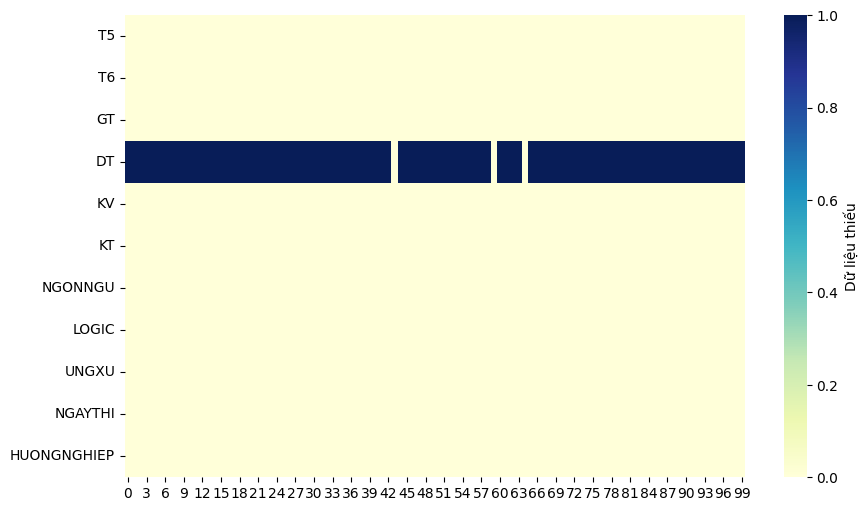

In [33]:
# dùng heatmap để trực quan dữ liệu bị thiếu
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu',
cbar_kws={'label':'Dữ liệu thiếu'})
plt.savefig('missingdata.png',dpi=100)

In [34]:
'''
Note: Với dữ liệu bị thiếu:
    1. Cần xác định biến số nào bị thiếu
    2. Mức độ thiếu dữ liệu
    3. Có cần phải xử lý không
'''

'\nNote: Với dữ liệu bị thiếu:\n    1. Cần xác định biến số nào bị thiếu\n    2. Mức độ thiếu dữ liệu\n    3. Có cần phải xử lý không\n'

In [35]:
# Điền giá trị thiếu
df['DT'].fillna('KINH',inplace=True)
# Lưu ý: Với biến định tính ta có thể thay bằng giá trị yếu vị (mode)
# df['DT].fillna(df['DT'].mode()[0],inplace=True)

C:\Users\Lan Anh\AppData\Local\Temp\ipykernel_7932\614927762.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'KINH' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['DT'].fillna('KINH',inplace=True)


In [36]:
# Điền thiếu giá trị phần NGONNGU bằng 0 (nếu có)
df['NGONNGU'].fillna(0,inplace=True)
# Điền thiếu giá trị phần LOGIC bằng trung bình (nếu có)
df['LOGIC'].fillna(df['LOGIC'].mean(), inplace=True)
# Điền thiếu giá trị phần UNGXU bằng trung vị (nếu có)
df['UNGXU'].fillna(df['UNGXU'].median(),inplace=True)
# Lưu ý: Với biến định lượng thì ta nên thay bằng trung vị

In [37]:
df.head(5)

,T5,T6,GT,DT,KV,KT,NGONNGU,LOGIC,UNGXU,NGAYTHI,HUONGNGHIEP
0,7.4,6.9,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No
1,3.0,4.0,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes
2,4.8,5.7,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No
3,6.1,7.4,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No
4,6.8,8.0,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No


In [38]:
'''
Phần 2: Kỹ thuật Feature Engineering (thường dùng cho Machine Learning)
    Nếu chỉ là xử lý phân tích dữ liệu thì ta gọi là New Attribute
    Đây là kỹ thuật tạo thêm hoặc biến đổi số liệu sẵn có thành các biến số mới phù
    hợp với nghiệp vụ để phân tích
'''

'\nPhần 2: Kỹ thuật Feature Engineering (thường dùng cho Machine Learning)\n    Nếu chỉ là xử lý phân tích dữ liệu thì ta gọi là New Attribute\n    Đây là kỹ thuật tạo thêm hoặc biến đổi số liệu sẵn có thành các biến số mới phù\n    hợp với nghiệp vụ để phân tích\n'

In [39]:
# Tạo biến TBTOAN: trung bình toán lớp 12

df['TBTOAN'] = (df['T5']+df['T6'])/2

In [40]:
df.head(5)

,T5,T6,GT,DT,KV,KT,NGONNGU,LOGIC,UNGXU,NGAYTHI,HUONGNGHIEP,TBTOAN
0,7.4,6.9,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,7.15
1,3.0,4.0,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,3.50
2,4.8,5.7,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.25
3,6.1,7.4,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,6.75
4,6.8,8.0,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,7.40


In [41]:
# Tạo biến XEPLOAI: đánh giá môn toán dựa trên df['TBTOAN']
df.loc[df['TBTOAN'] < 5.0, 'XEPLOAI'] = 'FAIL'
df.loc[(df['TBTOAN'] >= 5.0) & (df['TBTOAN'] < 7.0) , 'XEPLOAI'] = 'FAIR'
df.loc[(df['TBTOAN'] >= 7.0) & (df['TBTOAN'] < 9.0) , 'XEPLOAI'] = 'GOOD'
df.loc[(df['TBTOAN'] >= 9.0), 'XEPLOAI'] = 'EXCEL'

C:\Users\Lan Anh\AppData\Local\Temp\ipykernel_7932\1779497314.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'FAIL' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['TBTOAN'] < 5.0, 'XEPLOAI'] = 'FAIL'


In [42]:
df.head(5)

,T5,T6,GT,DT,KV,KT,NGONNGU,LOGIC,UNGXU,NGAYTHI,HUONGNGHIEP,TBTOAN,XEPLOAI
0,7.4,6.9,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,7.15,GOOD
1,3.0,4.0,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,3.50,FAIL
2,4.8,5.7,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.25,FAIR
3,6.1,7.4,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,6.75,FAIR
4,6.8,8.0,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,7.40,GOOD


In [43]:
# Xem thông tin 5 dòng đầu gồm các cột TBTOAN, XEPLOAI
df[['TBTOAN','XEPLOAI']].head(5)

,TBTOAN,XEPLOAI
0,7.15,GOOD
1,3.50,FAIL
2,5.25,FAIR
3,6.75,FAIR
4,7.40,GOOD


In [44]:
'''
Tạo biến nhóm khối thi NHOMKT thõa mãn
    A1: G1
    C: G3
    D1: G3
    A: G1
    B: G2
'''

dict_map = {'A1':'G1','C':'G3','D1':'G3','A':'G1','B':'G2'}
df['NHOMKT'] = df['KT'].map(dict_map)

In [45]:
df[['KT','NHOMKT']].head(5)

,KT,NHOMKT
0,A1,G1
1,C,G3
2,C,G3
3,D1,G3
4,A,G1


In [46]:
# Tạo biến số điểm cộng: CONG
'''
Nếu khối thi thuộc nhóm G1, G2 và TBTOAN >= 5.0 thì là 1.0
Ngược lại thì là 0.0
'''

def fplus(x,y):
    if(x == 'G1' or x == 'G2') and (y>=5.0):
        return 1.0
    else:
        return 0.0

df['CONG'] = list(map(fplus,df['NHOMKT'],df['TBTOAN']))

In [47]:
df[['TBTOAN','NHOMKT','CONG']].head(5)

,TBTOAN,NHOMKT,CONG
0,7.15,G1,1.0
1,3.50,G3,0.0
2,5.25,G3,0.0
3,6.75,G3,0.0
4,7.40,G1,1.0
